# Regressão

Nome: Ricardo Coutinho Cordeiro

Professor: Ulisses Brisolara Corrêa


##Importações básicas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#Regressão

Na tarefa dessa semana, iremos explorar aplicações de modelos de regressão. Diferente de modelos de classificação, onde desejamos descobrir a qual classe pertence uma amostra com base nos outros dados fornecidos, os modelos de regressão nos retornam um valor numérico.

Realize a aplicação das técnicas apresentadas a seguir e, por fim, escreva uma breve conclusão comparando os resultados obtidos entre os modelos utilizando as diferentes métricas de avaliação.


Materiais de apoio:

*   https://ricardomatsumura.medium.com/aprendizado-supervisionado-regress%C3%A3o-363547528ce5
*   https://www.geeksforgeeks.org/regression-in-machine-learning/

## Baixar dataset

O conjunto utilizado nesta tarefa está disponível no seguinte link:

https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

Pesquise como utilizar um conjunto de dados tabular disponibilizado no github. É uma tarefa bem simples, então você não deverá ter problemas.

Além disso, verifique a qualidade do dataset e veja se é necessário realizar alguma forma de tratamento de dados.

In [ ]:
# baixar o dataset
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
dataset = pd.read_csv(url)

# cabeca do dataset
print(dataset.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# Pré-processamento

In [ ]:
# pré-processamento
def preprocessar_dados(dataset):
    dataset = pd.get_dummies(dataset, drop_first=True)
    X = dataset.drop('charges', axis=1)
    y = dataset['charges']
    return train_test_split(X, y, test_size=0.2, random_state=42)

# normalização
def normalizar_dados(X_treino, X_teste):
    scaler = StandardScaler()
    X_treino = scaler.fit_transform(X_treino)
    X_teste = scaler.transform(X_teste)
    return X_treino, X_teste

# Treinar e avaliar

In [ ]:
# treinar e avaliar modelos
def treinar_avaliar_modelos(X_treino, y_treino, X_teste, y_teste, modelos):
    resultados = {}
    for nome, modelo in modelos.items():
        modelo.fit(X_treino, y_treino)
        y_pred = modelo.predict(X_teste)

        mse = mean_squared_error(y_teste, y_pred)
        mae = mean_absolute_error(y_teste, y_pred)
        r2 = r2_score(y_teste, y_pred)

        resultados[nome] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    return resultados, modelos

# Plotar resultados

In [ ]:
def plotar_metricas(resultados):
    resultados_df = pd.DataFrame(resultados).T
    print(resultados_df)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    sns.barplot(x=resultados_df.index, y='MSE', data=resultados_df, ax=axes[0])
    axes[0].set_title('Mean Squared Error (MSE)')
    sns.barplot(x=resultados_df.index, y='MAE', data=resultados_df, ax=axes[1])
    axes[1].set_title('Mean Absolute Error (MAE)')
    sns.barplot(x=resultados_df.index, y='R2', data=resultados_df, ax=axes[2])
    axes[2].set_title('R2 Score')
    plt.tight_layout()
    plt.show()

# plotar resultados dos modelos
def plotar_resultados(model, X_teste, y_teste, titulo):
    y_pred = model.predict(X_teste)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_teste, y_pred, alpha=0.3)
    plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'r--', linewidth=2)
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Preditos')
    plt.title(titulo)
    plt.show()

##Regressão Linear

Materiais de apoio:

*   https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares



                           MSE          MAE        R2
Regressao Linear  3.359692e+07  4181.194474  0.783593
Regressao Ridge   3.360497e+07  4182.796597  0.783541
Regressao Lasso   3.359734e+07  4181.226051  0.783590


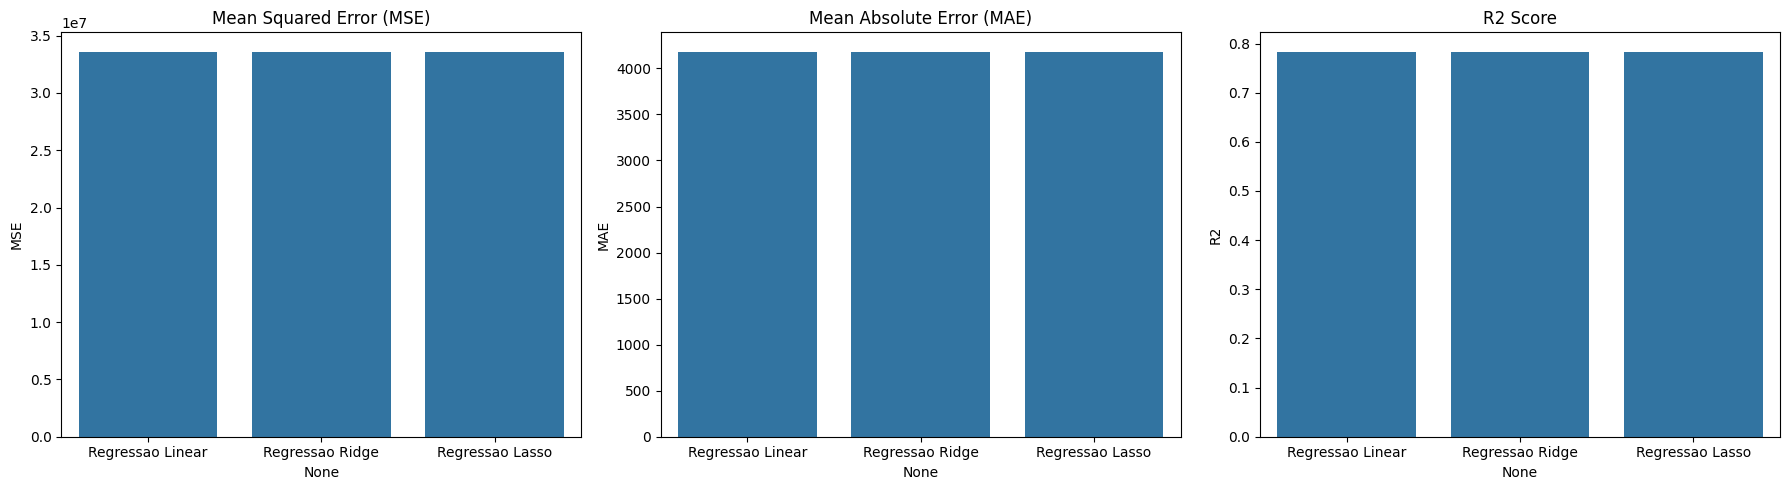

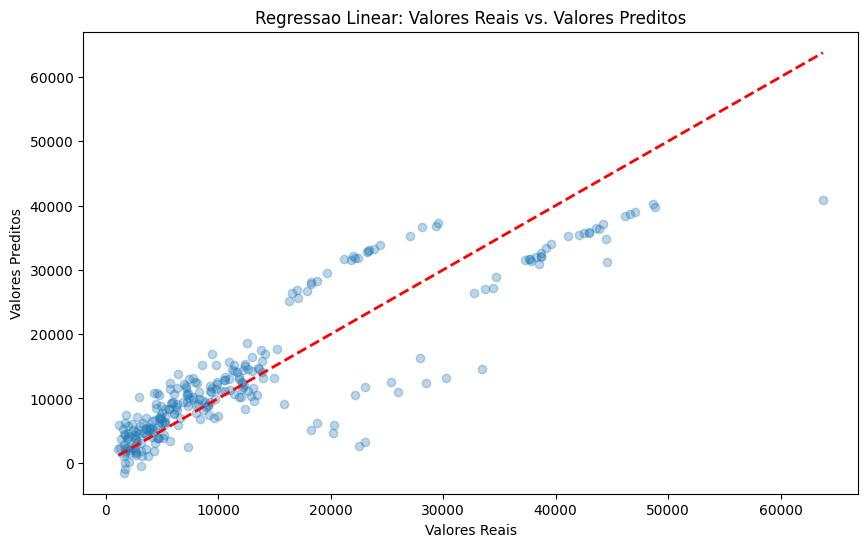

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Regressão Linear
modelos_rl = {
    'Regressao Linear': LinearRegression(),
    'Regressao Ridge': Ridge(alpha=1.0),
    'Regressao Lasso': Lasso(alpha=0.1)
}

# treinar e avaliar modelos
resultados_rl, modelos_rl = treinar_avaliar_modelos(X_treino, y_treino, X_teste, y_teste, modelos_rl)

# Plotar métricas
plotar_metricas(resultados_rl)

# Plotar linha de regressão linear
plotar_resultados(modelos_rl['Regressao Linear'], X_teste, y_teste, 'Regressao Linear: Valores Reais vs. Valores Preditos')

##SVR - Support Vector Regression

Materiais de apoio:


*   https://scikit-learn.org/stable/modules/svm.html#regression


                         MSE          MAE        R2
SVR Linear      1.521749e+08  8038.314457  0.019799
SVR RBF         1.661288e+08  8612.408423 -0.070082
SVR Polynomial  1.663456e+08  8628.582335 -0.071478


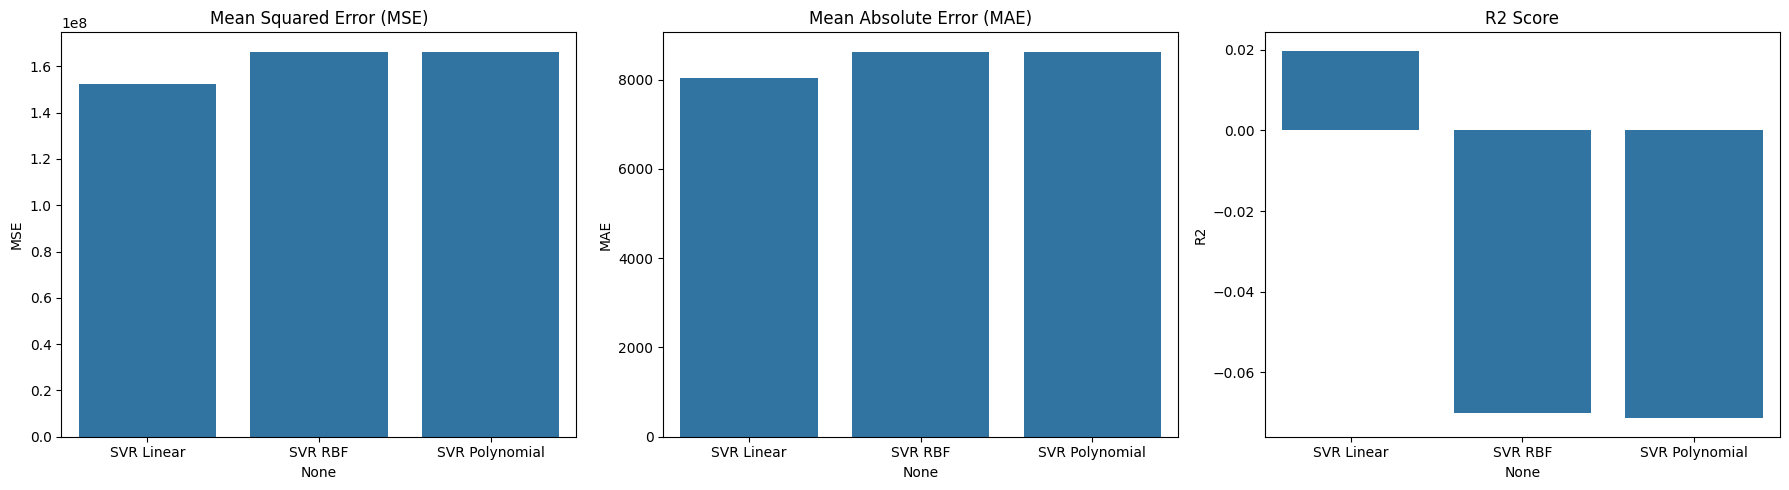

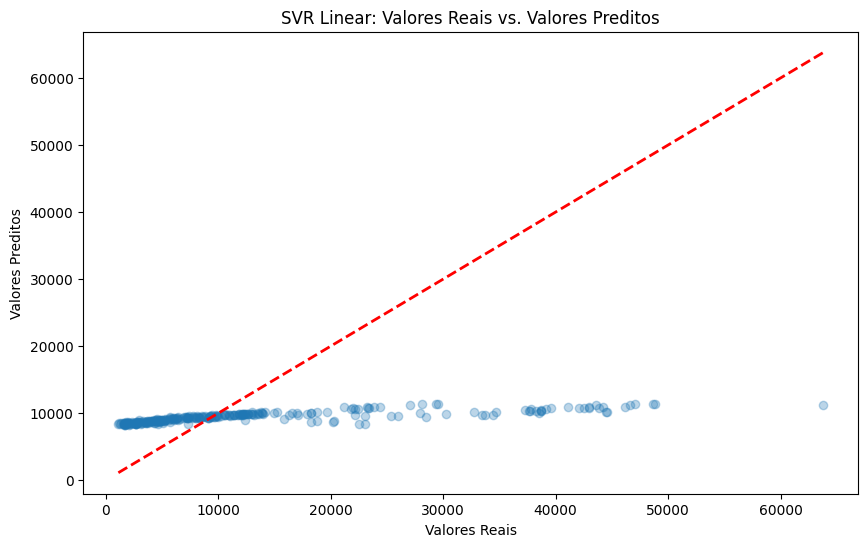

In [ ]:
from sklearn.svm import SVR

# Modelos SVR
modelos_svr = {
    'SVR Linear': SVR(kernel='linear'),
    'SVR RBF': SVR(kernel='rbf'),
    'SVR Polynomial': SVR(kernel='poly', degree=2)
}

# Treinar e avaliar modelos
resultados_svr, modelos_svr = treinar_avaliar_modelos(X_treino, y_treino, X_teste, y_teste, modelos_svr)

# Plotar métricas
plotar_metricas(resultados_svr)

# Plotar resultados do SVR
plotar_resultados(modelos_svr['SVR Linear'], X_teste, y_teste, 'SVR Linear: Valores Reais vs. Valores Preditos')


## MLP (sklearn)

Materiais de apoio:


*   https://scikit-learn.org/stable/modules/neural_networks_supervised.html#regression



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


                       MAE           MSE        R2
MLP Regressor  7396.675933  1.157739e+08  0.254268


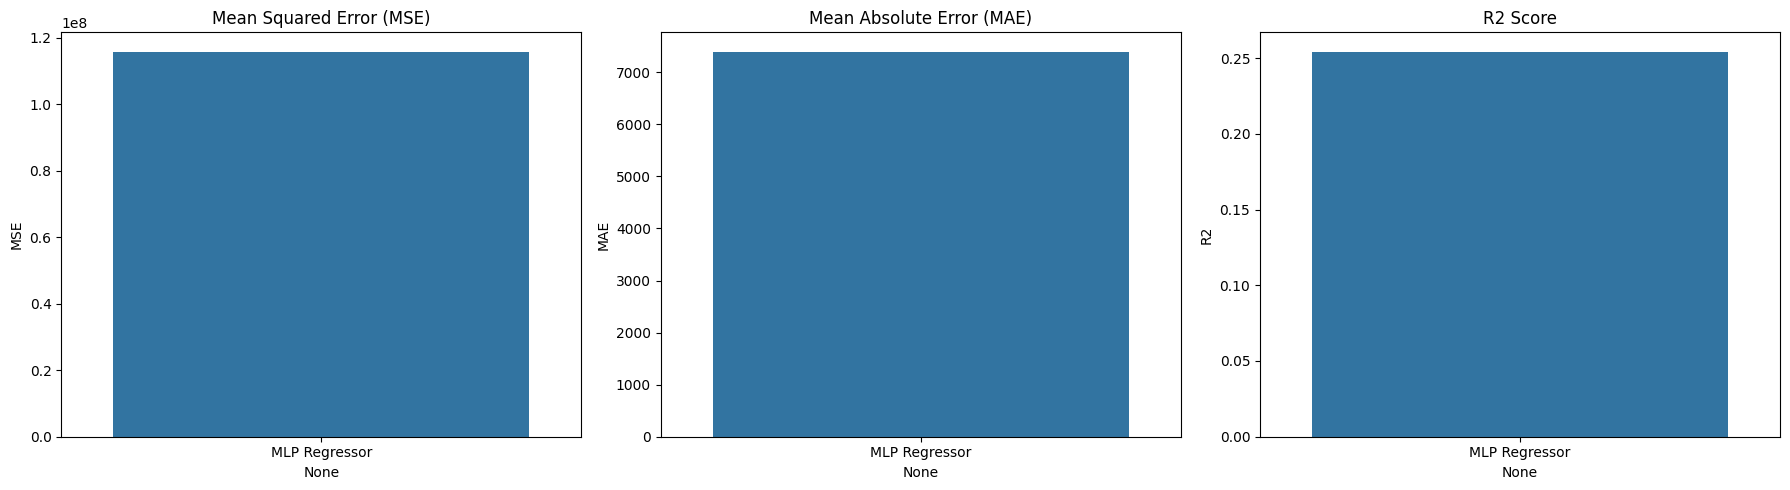

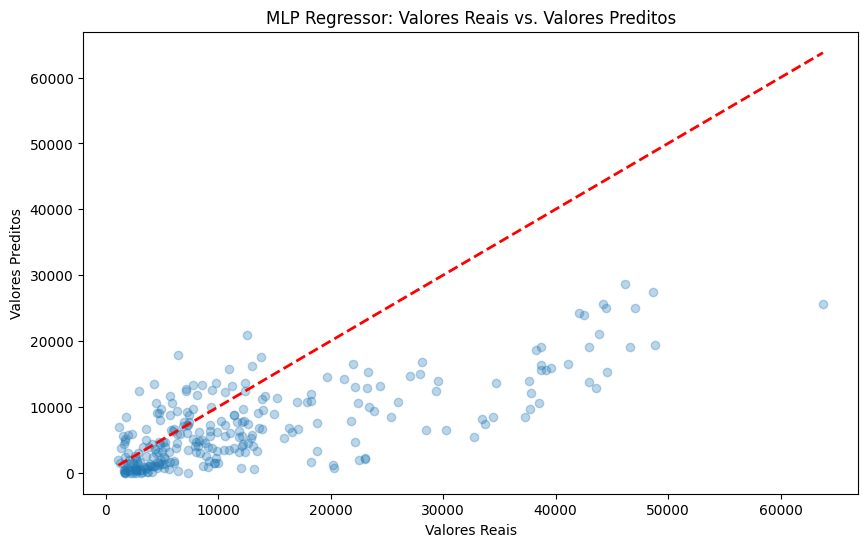

In [ ]:
from sklearn.neural_network import MLPRegressor

# Modelos MLP
modelos_mlp = {
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Treinar e avaliar modelos
resultados_mlp, modelos_mlp = treinar_avaliar_modelos(X_treino, y_treino, X_teste, y_teste, modelos_mlp)

# Plotar métricas
plotar_metricas(resultados_mlp)

# Plotar resultados do MLP Regressor
plotar_resultados(modelos_mlp['MLP Regressor'], X_teste, y_teste, 'MLP Regressor: Valores Reais vs. Valores Preditos')


#Métricas de Avaliação

Devido à natureza distinta dos problemas e dos resultados obtidos em tarefas de classificação e regressão, as métricas utilizadas para avaliar a performance nesses dois tipos de tarefas são diferentes. Em tarefas de regressão, a saída do modelo é um valor contínuo, e as métricas ajudam a entender o quão próximas as previsões estão dos valores verdadeiros, além de identificar a magnitude dos erros de previsão.

Materiais de apoio:

*   https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

*   https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/

*   https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/

O link fornecido no inicio dessa tarefa, do professor Ricardo Araujo, também possui informações uteis sobre as métricas de avaliação.

#Conclusão

## Regressão Linear

A regressão linear apresentou um desempenho relativamente bom, com um valor de R² de aproximadamente 0.78, indicando que cerca de 78% da variabilidade nos valores de "charges" pode ser explicada pelas variáveis independentes. Os valores preditos estão bem alinhados com os valores reais, como mostrado no gráfico, exceto para alguns valores extremos.

## Support Vector Regression (SVR)

O SVR parece ter dificuldades em capturar a variação nos dados de maneira eficaz, especialmente para valores maiores de "charges". Isso é evidente pelo fato de que muitos valores preditos estão bastante distantes da linha de referência (linha vermelha) e são subestimados.

## Multi-Layer Perceptron (MLP)

O modelo de MLP não se saiu bem para esse conjunto de dados, com um valor de R² de apenas 0.25. Isso indica que o modelo de MLP foi capaz de explicar apenas 25% da variabilidade nos valores de "charges", o que é significativamente pior em comparação com a regressão linear. O gráfico também mostra uma grande dispersão dos valores preditos em relação aos valores reais, especialmente para valores maiores.

##Comparação Geral

*   **Regressão Linear:** Melhor desempenho geral, com um R² elevado e erros relativamente baixos (MSE e MAE).
*   **SVR:** Não conseguiu capturar bem a variabilidade dos dados, especialmente para valores maiores de "charges".
*   **MLP:** Desempenho inferior, com alta variabilidade nos valores preditos e um baixo R².






